In [39]:
import pandas as pd
import geopandas as gpd
import numpy as np
%pylab inline
pylab.rcParams['figure.figsize'] = (20.0, 20.0)

Populating the interactive namespace from numpy and matplotlib


In [40]:
road_merge = pd.read_pickle('road_merge.pickle')

In [41]:
road_merge[~road_merge['TotalVol'].isnull()].head()

,TotalVol,centroid,geometry,name,set,x,y
y,,,,,,,
2.775622e+06,310431.000,POINT (303136.7666760656 2775621.887421818),LINESTRING (303195.0455006739 2775885.16319138...,中山南北路,"(基河路, 小北街)",303136.766676,NaN
2.776187e+06,240295.000,POINT (303227.938516076 2776187.235380104),LINESTRING (303234.0590565056 2776491.16083247...,中山南北路,"(中正路, 小北街)",303227.938516,NaN
2.777540e+06,209187.875,POINT (302945.993934618 2777540.131702279),LINESTRING (302949.3103567673 2777673.66629230...,中山南北路,"(德行東西路, 忠誠路)",302945.993935,NaN
2.777967e+06,137684.000,POINT (302993.588100909 2777966.832806859),LINESTRING (302949.9123668254 2777673.79029815...,中山南北路,"(士東路, 德行東西路)",302993.588101,NaN
2.778627e+06,55071.000,POINT (303245.6300697403 2778627.282765958),LINESTRING (303052.8347356209 2778252.62793530...,中山南北路,"(士東路, 天母東路)",303245.630070,NaN


In [42]:
del road_merge['y']

In [43]:
road_merge = road_merge.reset_index()

In [44]:
accident_102y_twd97 = pd.read_csv('./20151114 Accident/102y_twd97.csv')

In [49]:
accident_102y_twd97_.ix[0]

CASE_NO                    C9121754
ACCD_TP                           2
Sub_bur                          C9
Eve_time                10212022335
YEAR                            102
MONTH                            12
HOUR                             23
Two_HOUR                         12
Three_HOUR                        8
WEEKDAY                           1
Distr                           100
Num_casual                        0
Num_wound                         1
Weather                           3
Light_condition                   2
Road_category                     2
Speed_limit                      40
Road_type                         1
Acc_location                      4
Pavement_con                      2
Signal_classfication              1
Accident_type                    12
Sex                               1
AGE                               4
Protect_equip                     1
Mobile                            1
Car_type                          6
Move_type                   

In [45]:
accident_102y_twd97_ = pd.read_csv('./20151114 Accident/102y.csv')

In [46]:
accident_102y_twd97.head(2)

,CASE_NO,IEOK_01,ACCD_TP,Year,x_coord,y_coord
0,CE110937,10205151130,3,102,306662.5403,2764734.201
1,C7145174,10204121450,2,102,303363.5000,2772762.000


In [37]:
accident_102y_twd97_['Weather'].unique()

array([3, 2, 1])

In [33]:
accident_102y_twd97_['Timestamp'] = accident_102y_twd97_['Eve_time'].apply(
    lambda t: '%d-%s-%s %s:%s' % (
        int(str(t)[0:3])+1911,
        str(t)[3:5],
        str(t)[5:7],
        str(t)[7:9],
        str(t)[9:]
    )
)

accident_102y_twd97_['Timestamp'] = pd.to_datetime(accident_102y_twd97_['Timestamp'])

In [36]:
accident_102y_twd97_.columns

Index(['CASE_NO', 'ACCD_TP', 'Sub_bur', 'Eve_time', 'YEAR', 'MONTH', 'HOUR',
       'Two_HOUR', 'Three_HOUR', 'WEEKDAY', 'Distr', 'Num_casual', 'Num_wound',
       'Weather', 'Light_condition', 'Road_category', 'Speed_limit',
       'Road_type', 'Acc_location', 'Pavement_con', 'Signal_classfication',
       'Accident_type', 'Sex', 'AGE', 'Protect_equip', 'Mobile', 'Car_type',
       'Move_type', 'Qualified', 'Alcohol', 'Timestamp'],
      dtype='object')

In [11]:
len(accident_102y_twd97)

35133

In [12]:
import shapely

In [13]:
accident_102y_twd97['geometry'] = accident_102y_twd97[['x_coord', 'y_coord']].apply(
    lambda t: shapely.geometry.Point(t[0], t[1]), axis=1
)

In [14]:
accident_102y_twd97 = gpd.GeoDataFrame(accident_102y_twd97)

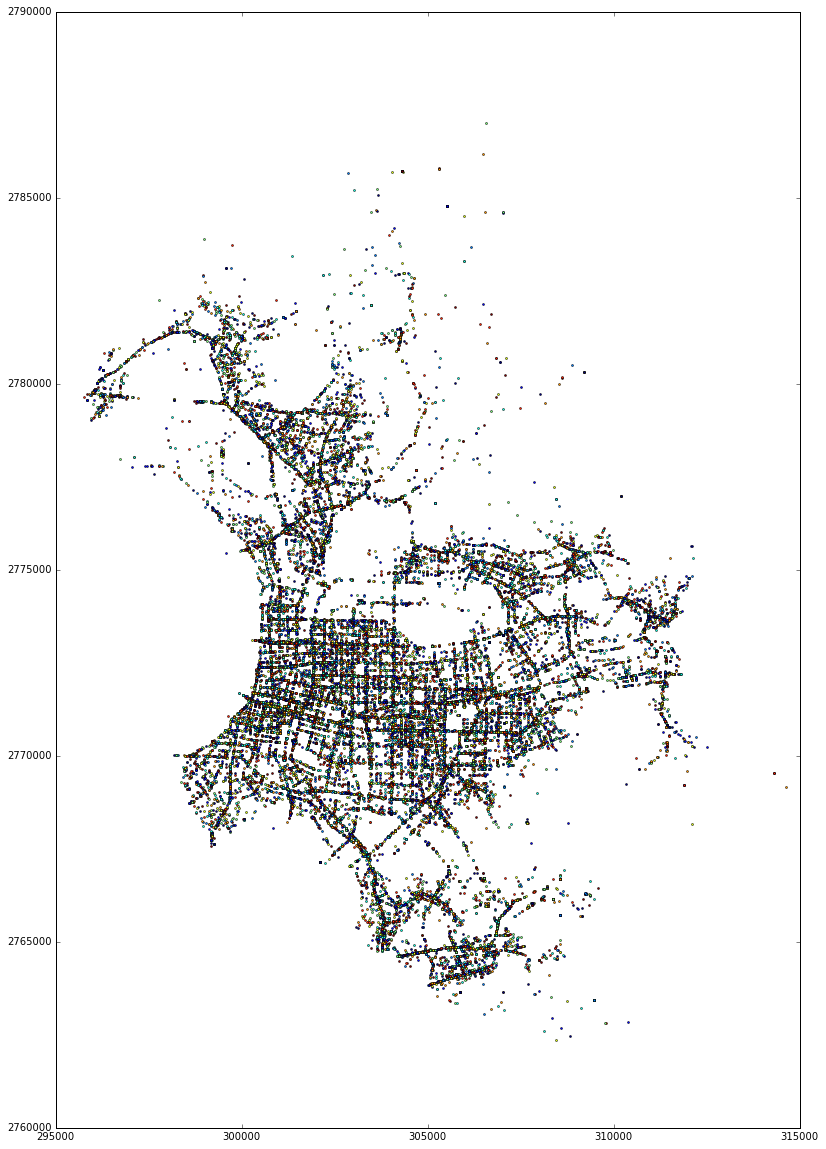

In [15]:
accident_102y_twd97.plot()

In [16]:
len(accident_102y_twd97)

35133

In [17]:
sample = accident_102y_twd97.sample(8000)

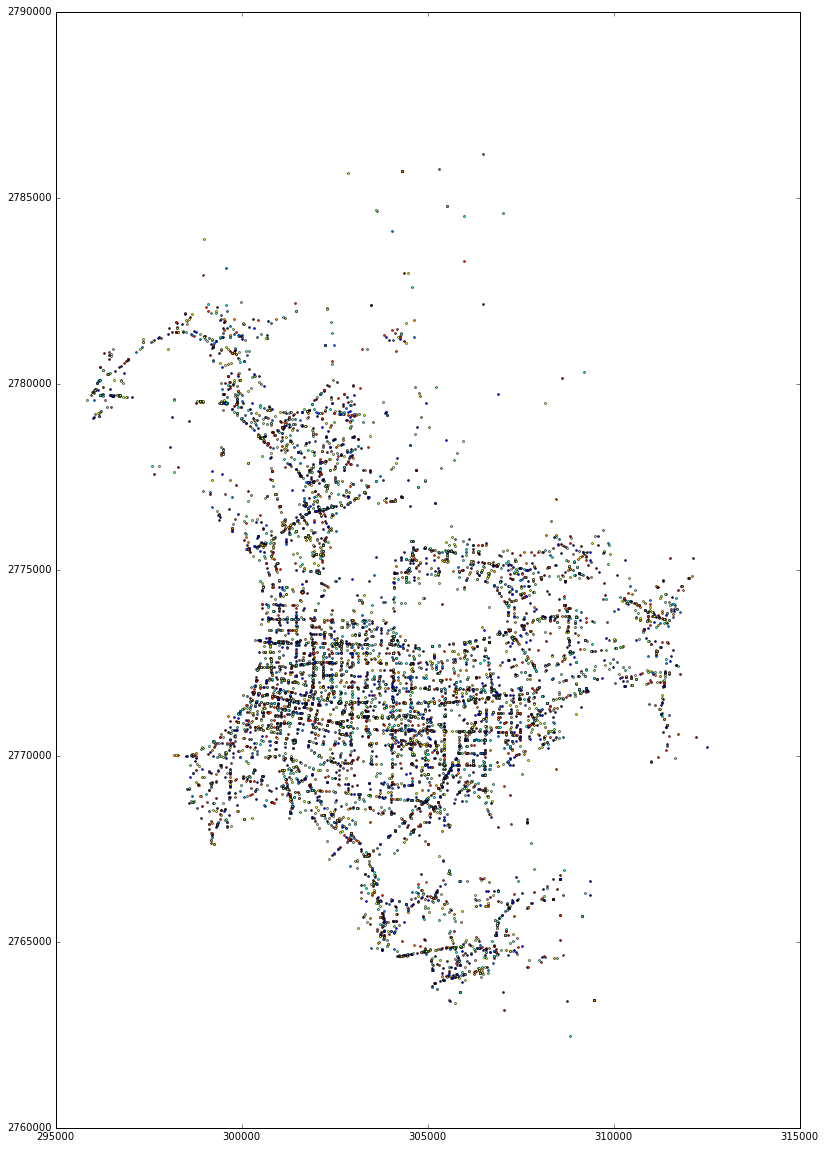

In [18]:
sample.plot()

In [19]:
sample_in_buffer = sample[sample.intersects(road_merge.unary_union.buffer(40))]

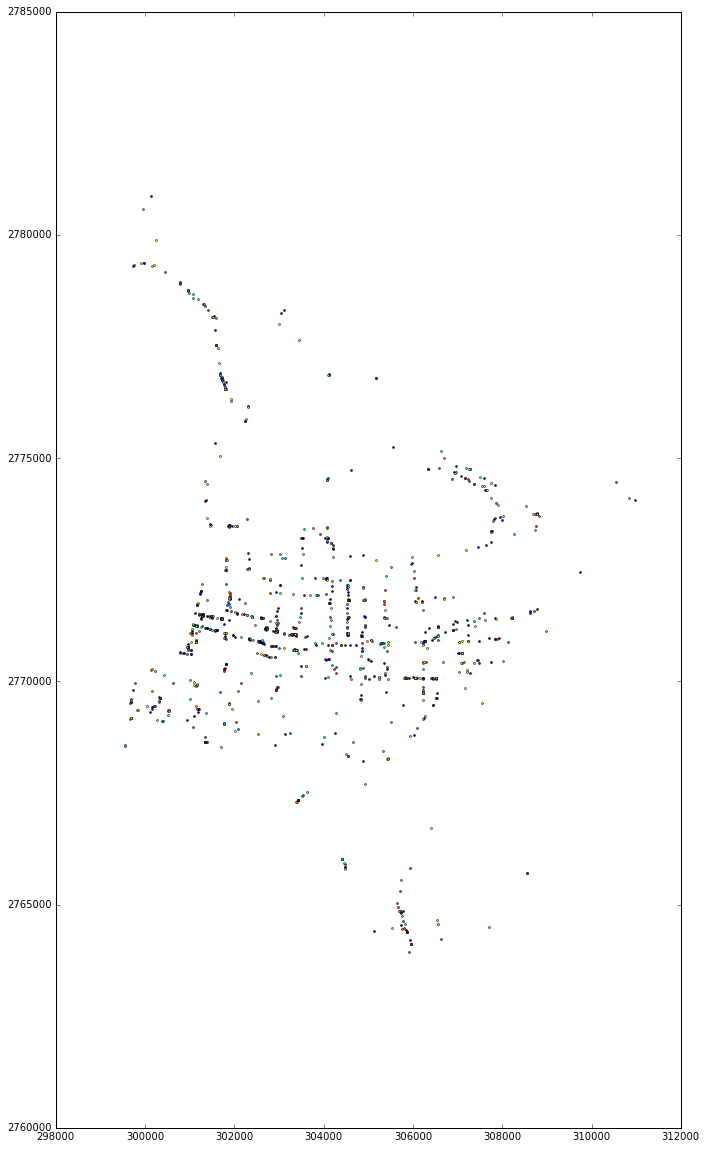

In [20]:
sample_in_buffer.plot()

In [21]:
road_df = road_merge.copy()

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/geopandas-0.1.0.dev_320b75d-py3.4.egg/geopandas/plotting.py:225: FutureWarning: 'colormap' is deprecated, please use 'cmap' instead (for consistency with matplotlib)
  "(for consistency with matplotlib)", FutureWarning)


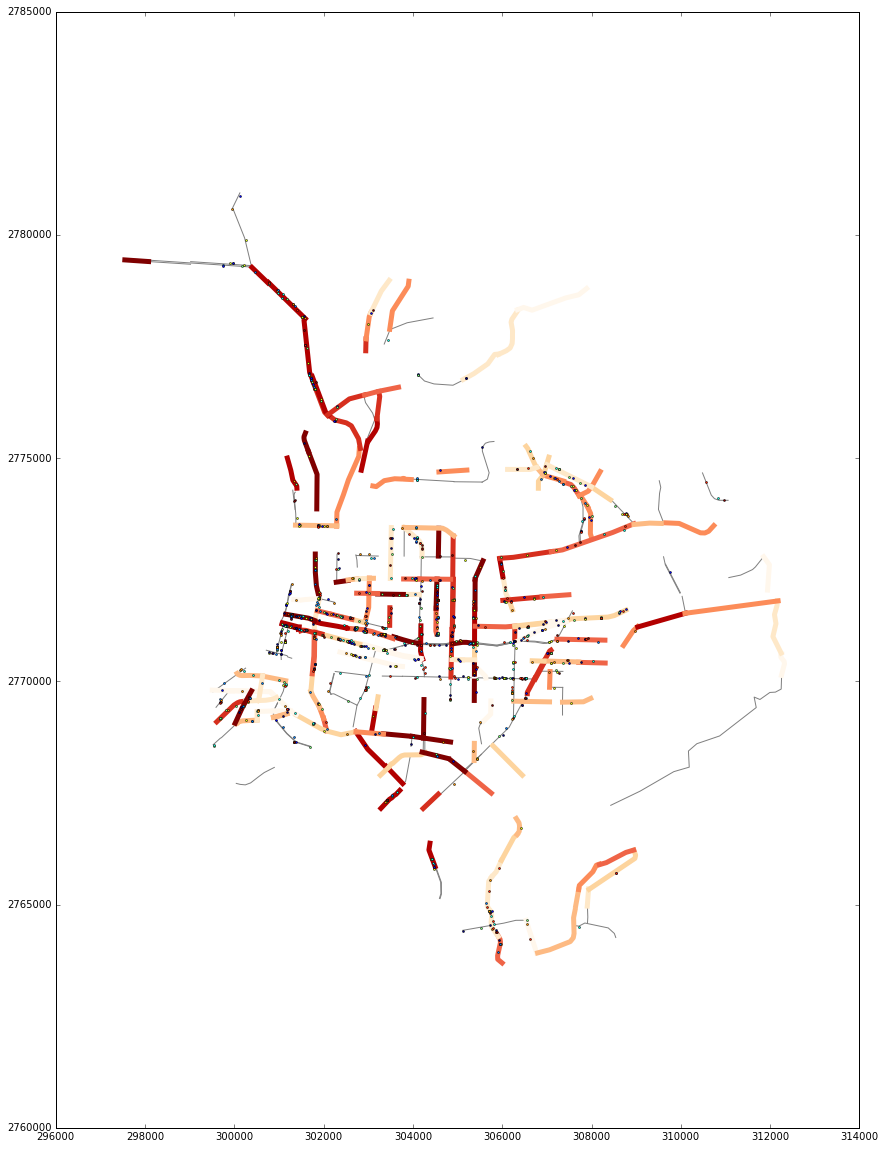

In [22]:
ax = road_df[road_df['TotalVol'].isnull()].plot(color='gray')
road_df[~road_df['TotalVol'].isnull()].plot(column='TotalVol', scheme='QUANTILES', k=9, colormap='OrRd', linewidth=5, ax=ax)
sample_in_buffer.plot(ax=ax)

In [23]:
from geopandas.tools import sjoin

In [24]:
# def f(geometry):
#     poi_buffer = gpd.GeoSeries(geometry.buffer(40))
#     poi_buffer = gpd.GeoDataFrame(geometry=poi_buffer)
#     return sjoin(road_merge, poi_buffer)

# sample_in_buffer.geometry.apply(f)

In [25]:
road_merge['road_id'] = road_merge.index

In [26]:
def f(geometry):
    geometry_x = gpd.GeoSeries(geometry[0])
    geometry_y = gpd.GeoSeries(geometry[1])
    return geometry_x.intersection(geometry_y).length

poi_buffer = sample_in_buffer.copy()
poi_buffer['geometry'] = sample_in_buffer.geometry.buffer(40)
road_in_bufer = sjoin(road_merge, poi_buffer)
# road_in_bufer.columns
road_in_bufer = pd.merge(road_in_bufer, poi_buffer, left_on='IEOK_01', right_on='IEOK_01')
# road_in_bufer
road_in_bufer['length'] = road_in_bufer[['geometry_x', 'geometry_y']].apply(f, axis=1)

In [27]:
road_in_length_total = pd.DataFrame(road_in_bufer.groupby('IEOK_01', as_index=False)['length'].sum())

In [28]:
road_in_bufer = pd.merge(road_in_bufer, road_in_length_total, left_on='IEOK_01', right_on='IEOK_01')

In [29]:
road_in_bufer['len_part'] = road_in_bufer['length_x'] / road_in_bufer['length_y']

In [30]:
road_accident_count = pd.DataFrame(road_in_bufer.groupby('road_id')['len_part'].sum())

In [31]:
road_accident_count = road_accident_count.rename(columns={'len_part': 'acc_count'})

In [32]:
road_accident_count = road_accident_count.reset_index()

In [33]:
road_merge = pd.merge(road_merge, road_accident_count, on='road_id')

In [34]:
road_merge = gpd.GeoDataFrame(road_merge)

In [35]:
road_df = road_merge

In [36]:
road_df.head()

,y,TotalVol,centroid,geometry,name,set,x,road_id,acc_count
0,2.769942e+06,NaN,POINT (302174.6329957501 2769941.733481717),LINESTRING (302229.9853347447 2770177.67849134...,中山南北路,"(仁愛路, 愛國東西路)",302174.632996,1,2.000000
1,2.777967e+06,137684.0,POINT (302993.588100909 2777966.832806859),LINESTRING (302949.9123668254 2777673.79029815...,中山南北路,"(士東路, 德行東西路)",302993.588101,6,1.630287
2,2.778627e+06,55071.0,POINT (303245.6300697403 2778627.282765958),LINESTRING (303052.8347356209 2778252.62793530...,中山南北路,"(士東路, 天母東路)",303245.630070,7,1.369713
3,2.768969e+06,NaN,POINT (301154.8908642664 2768969.345910037),LINESTRING (300996.6603272418 2769579.03017621...,中華路,"(和平東西路, 水源路)",301154.890864,8,4.300802
4,2.768977e+06,NaN,POINT (301158.0189772808 2768977.442067221),LINESTRING (301698.9484797145 2768547.59077903...,中華路,"(和平東西路, 泉州街)",301158.018977,9,4.928531


/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/geopandas-0.1.0.dev_320b75d-py3.4.egg/geopandas/plotting.py:225: FutureWarning: 'colormap' is deprecated, please use 'cmap' instead (for consistency with matplotlib)
  "(for consistency with matplotlib)", FutureWarning)


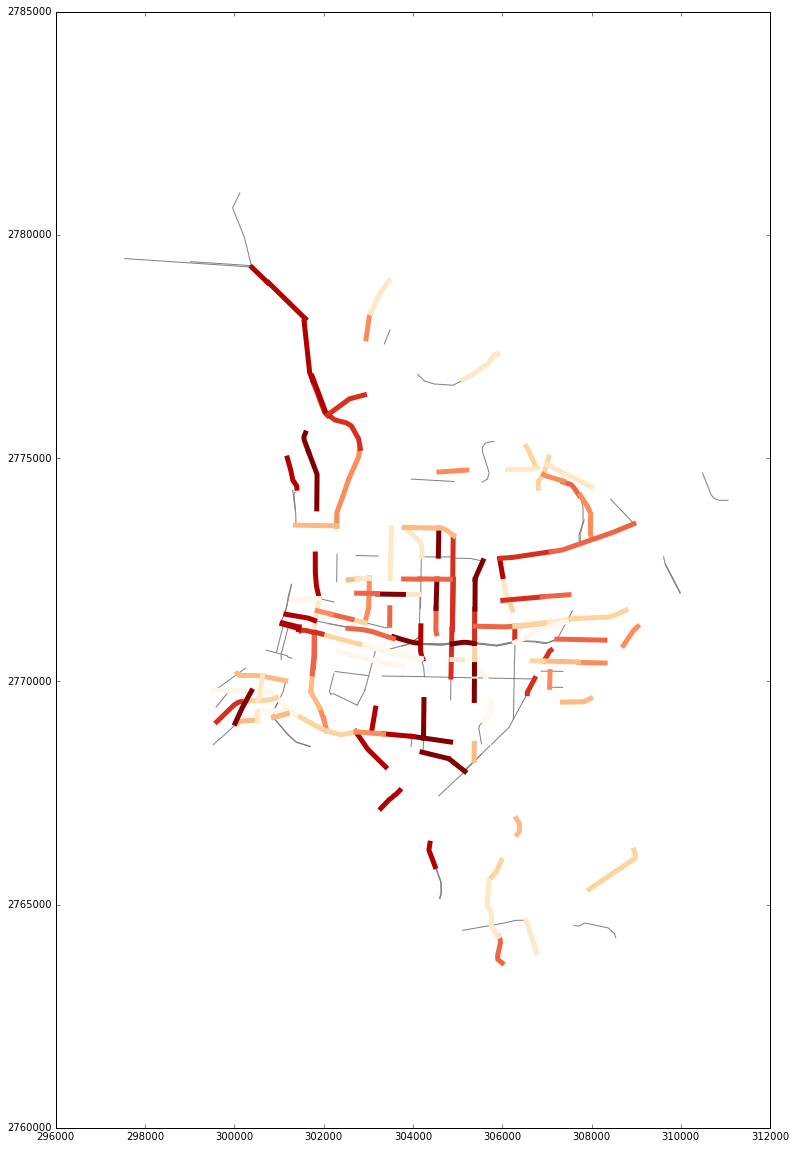

In [37]:
ax = road_df[road_df['TotalVol'].isnull()].plot(color='gray')
road_df[~road_df['TotalVol'].isnull()].plot(column='TotalVol', scheme='QUANTILES', k=9, colormap='OrRd', linewidth=5, ax=ax)

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/geopandas-0.1.0.dev_320b75d-py3.4.egg/geopandas/plotting.py:225: FutureWarning: 'colormap' is deprecated, please use 'cmap' instead (for consistency with matplotlib)
  "(for consistency with matplotlib)", FutureWarning)


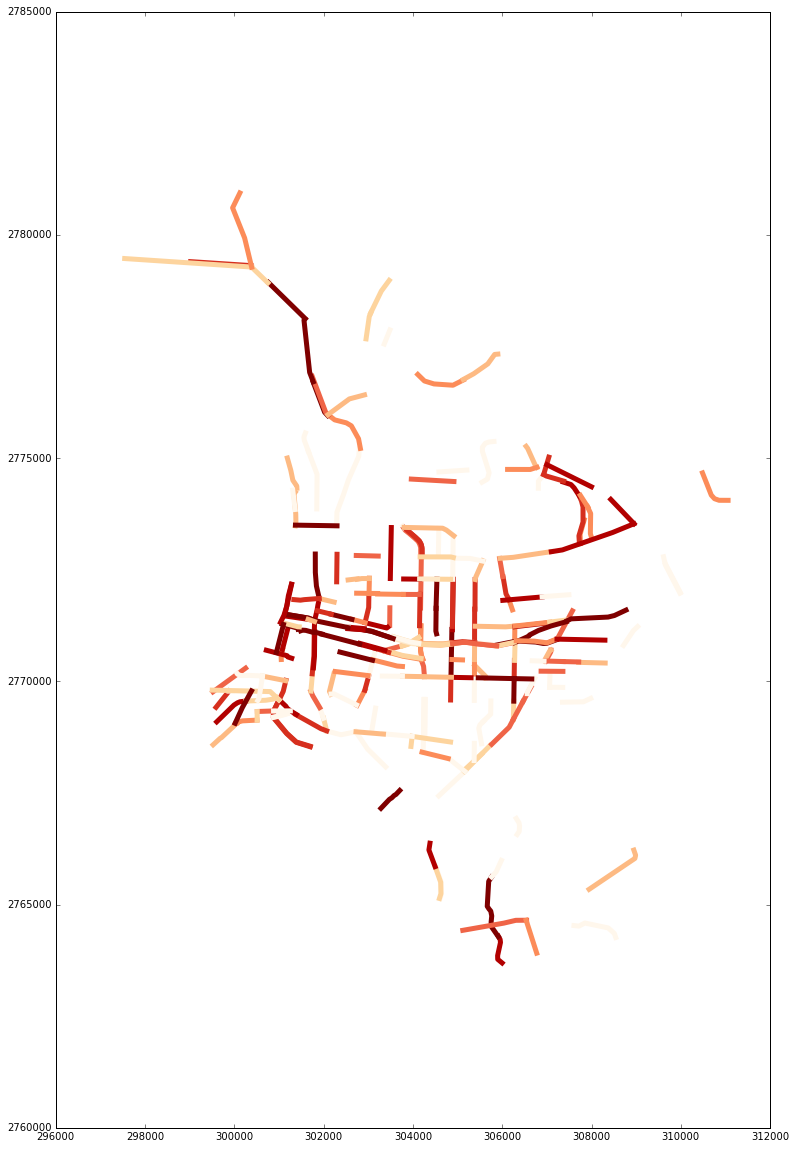

In [38]:
ax = road_df[road_df['acc_count'].isnull()].plot(color='gray')
road_df[~road_df['acc_count'].isnull()].plot(column='acc_count', scheme='QUANTILES', k=9, colormap='OrRd', linewidth=5, ax=ax)

In [39]:
road_df['p'] = road_df['acc_count'] / (road_df['TotalVol']/10*10)  / road_df.length

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/geopandas-0.1.0.dev_320b75d-py3.4.egg/geopandas/plotting.py:225: FutureWarning: 'colormap' is deprecated, please use 'cmap' instead (for consistency with matplotlib)
  "(for consistency with matplotlib)", FutureWarning)


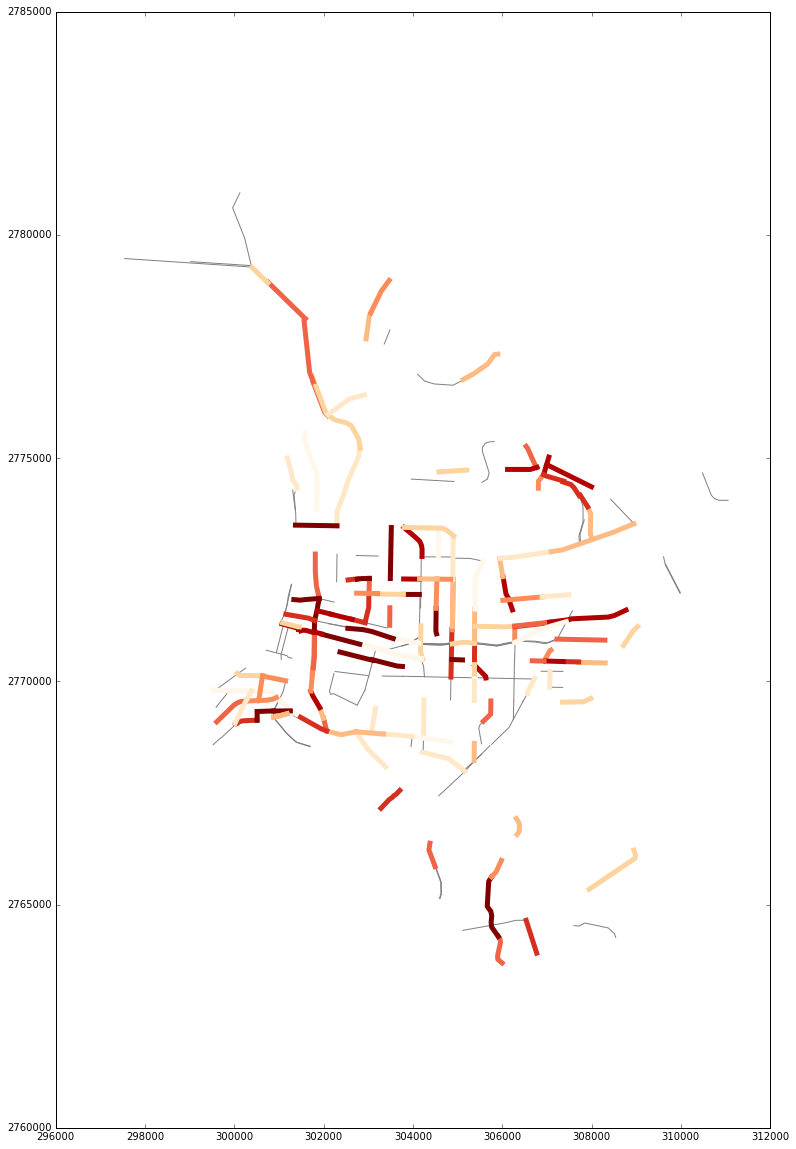

In [40]:
ax = road_df[road_df['p'].isnull()].plot(color='gray')
road_df[~road_df['p'].isnull()].plot(column='p', scheme='QUANTILES', k=9, colormap='OrRd', linewidth=5, ax=ax)

In [41]:
road_df_cen = road_df.copy()

In [42]:
road_df_cen.geometry = road_df_cen.centroid

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/geopandas-0.1.0.dev_320b75d-py3.4.egg/geopandas/plotting.py:225: FutureWarning: 'colormap' is deprecated, please use 'cmap' instead (for consistency with matplotlib)
  "(for consistency with matplotlib)", FutureWarning)


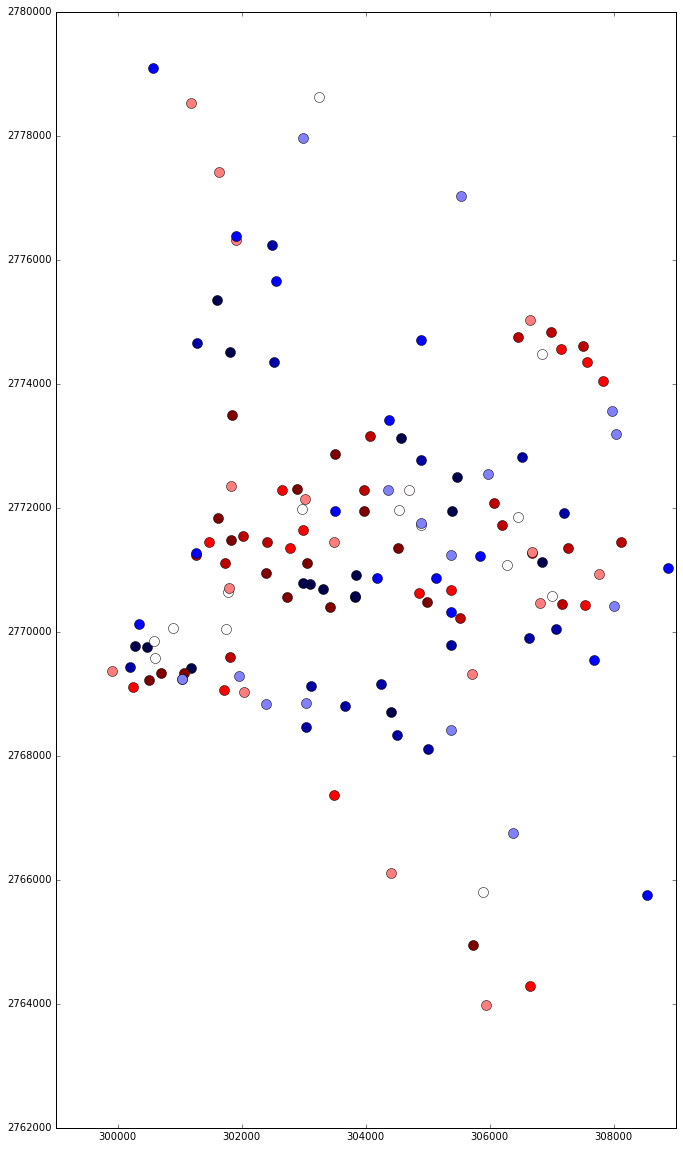

In [45]:
road_df_cen[~road_df_cen['p'].isnull()].plot(column='p', scheme='QUANTILES', k=9, colormap='seismic', markersize=10)

In [44]:
road_df_cen.to_pickle('road_df_cen.pickle')